In [26]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

#importing data
url<-"https://raw.githubusercontent.com/zchen189/Group-Project/refs/heads/main/players.csv"
players<-read_csv(url)
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [27]:
url<-"https://raw.githubusercontent.com/zchen189/Group-Project/refs/heads/main/sessions.csv"
sessions<-read_csv(url)
sessions <- sessions |>
                            separate( col = start_time, into = c("start_date", "start_time"), sep = " ") |>
                            separate( col = end_time, into = c("end_date", "end_time"), sep = " ") |>
                            mutate(start_date = as.Date(start_date, format = "%d/%m/%Y")) |>
                            mutate(end_date = as.Date(end_date, format = "%d/%m/%Y")) #Making data tidy and putting date columns into date variable type
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time
<chr>,<date>,<chr>,<date>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,2024-06-30,18:12,2024-06-30,18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-06-17,23:33,2024-06-17,23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,2024-07-25,17:34,2024-07-25,17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-28,15:36,2024-07-28,15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,2024-07-25,06:15,2024-07-25,06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,2024-05-20,02:26,2024-05-20,02:45,1.71617e+12,1.71617e+12


In [28]:
#explore dataset to see subscribe conditions
players |>
  distinct(subscribe)
#to change subscribe condition to factors
players <- players |>
  mutate(subscribe = as_factor(subscribe)) |>
  mutate(subscribe = fct_recode(subscribe, "Y" = "TRUE", "N" = "FALSE"))
glimpse(players)
players


subscribe
<lgl>
TRUE
FALSE


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <fct> Y, Y, N, Y, Y, Y, Y, N, Y, Y, Y, Y, Y, Y, Y, N, Y, Y, Y, …
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22, 17…


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,Y,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,Y,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,N,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,N,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,N,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,Y,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [19]:
#explore dataset proportion
num_obs <-nrow(players)
players|>
  group_by(subscribe) |>
  summarize(count= n(),
    percentage = n() / num_obs * 100)

subscribe,count,percentage
<fct>,<int>,<dbl>
N,52,26.53061
Y,144,73.46939


subscribe,count,percentage
<fct>,<int>,<dbl>
N,52,26.53061
Y,144,73.46939


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,Y,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,Y,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,N,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,N,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,N,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,Y,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


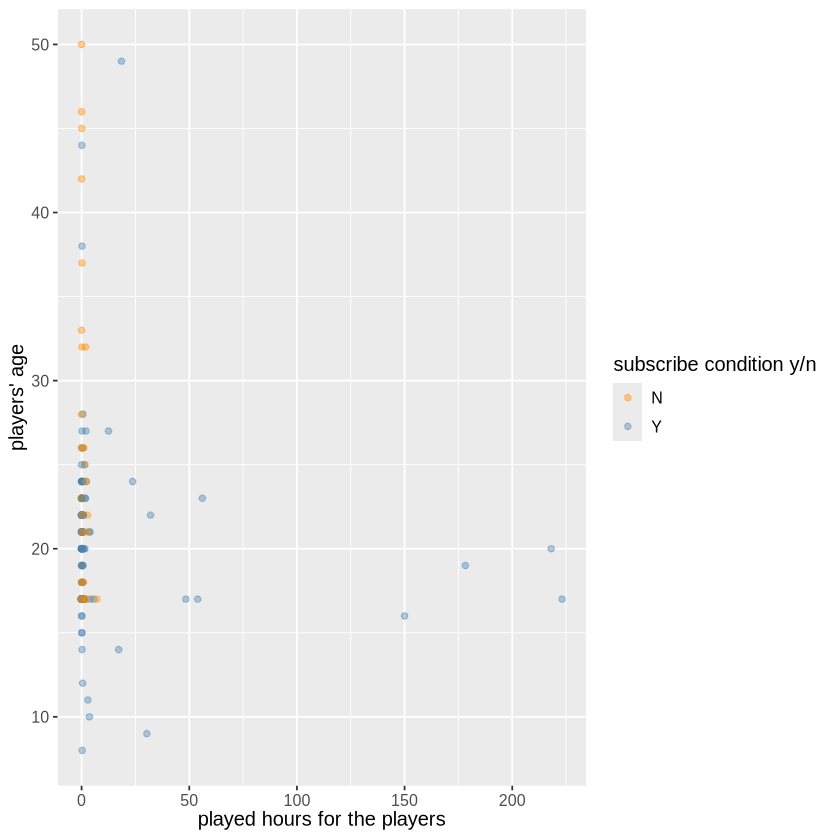

In [33]:
#to extra column we wanted
players_train<-players|>
select(played_hours,Age,subscribe)
players_train
glimpse(players)
hours_age<-players|>ggplot(aes(x=played_hours,y=Age,color=subscribe))+
geom_point(alpha=0.4)+
labs(x="played hours for the players", y="players' age", color="subscribe condition y/n")+
scale_color_manual(values=c("darkorange","steelblue"))+
theme(text=element_text(size=12))
hours_age



In [39]:
#to extra column we wanted
players_train<-players|>
select(played_hours,Age,subscribe)
players_train

played_hours,Age,subscribe
<dbl>,<dbl>,<fct>
30.3,9,Y
3.8,17,Y
0.0,17,N
⋮,⋮,⋮
0.0,17,N
2.3,17,N
0.2,NA,Y


In [41]:
#to set seed for reproducibility
set.seed(520)

In [43]:
#create the train/test split
split<-initial_split(players_train,prop=0.75,strata=subscribe)
train_set<-training(split)
test_set<-testing(split)
#review the training/testing set
glimpse(train_set)
glimpse(test_set)

Rows: 147
Columns: 3
$ played_hours <dbl> 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 1.4, 0.0, 0.9, 0.1, 0.2, 0.…
$ Age          <dbl> 21, 22, 17, 23, 18, 33, 25, 24, 18, 22, 37, 28, 23, 17, 1…
$ subscribe    <fct> N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, N, …
Rows: 49
Columns: 3
$ played_hours <dbl> 0.0, 0.7, 0.0, 1.0, 0.4, 0.0, 5.6, 0.0, 0.0, 0.4, 0.0, 0.…
$ Age          <dbl> 17, 21, 17, 17, 20, 17, 17, 21, 23, 22, 42, 17, 17, 23, 2…
$ subscribe    <fct> N, Y, Y, Y, Y, Y, Y, Y, N, Y, N, Y, Y, Y, Y, Y, Y, Y, Y, …
